In [1]:
# Importing the PoLite package
import PoLite as pol

# Define the name for the file to be imported
hawc_file = '30dor_hawc_d.fits'

# Load the HAWC+ file into an "obs" object
polobs = pol.load_hawc(hawc_file)


Kindly loading HAWC+ data

Opening FITS file:
30dor_hawc_d.fits

Astronomical object: 30Dor_D
Wavelength observed: 155.0 µm

Have a nice day!



Plotting a delightful polarization map

Plotting the Stokes I total intensity map

INFO: Auto-setting vmax to  3.458e+02 [aplpy.core]

Applying happy selection criteria on polarization vectors

Plotting the polarization vectors



Returning the APLpy figure as output, please feel free to improve it (see online APLpy.FITSFigure documentation)

Don't forget to save the results using the .savefig('name.png') function

Don't give up!


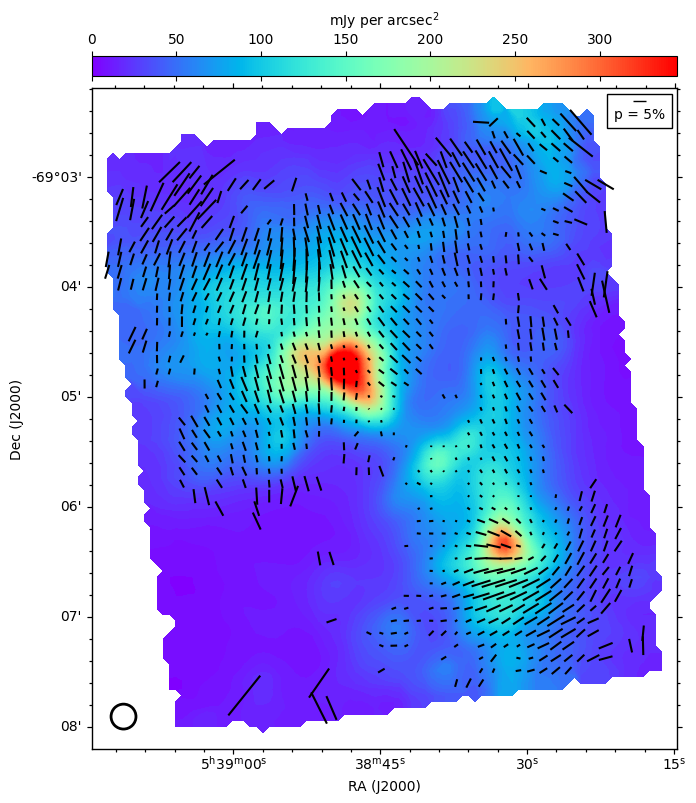

In [2]:
# Creating polarization map
polmap = polobs.polmap(stepvec=2) # plots every other vector to facilitate reading the figure, default is stepvec=1
polmap.savefig('polmap.png',dpi=300)


Plotting a lovable magnetic field map

Plotting the Stokes I total intensity map

INFO: Auto-setting vmax to  3.458e+02 [aplpy.core]



Applying happy selection criteria on polarization vectors

Plotting the magnetic field segments



Returning the APLpy figure as output, please feel free to improve it (see online APLpy.FITSFigure documentation)

Don't forget to save the results using the .savefig('name.png') function

Have fun!


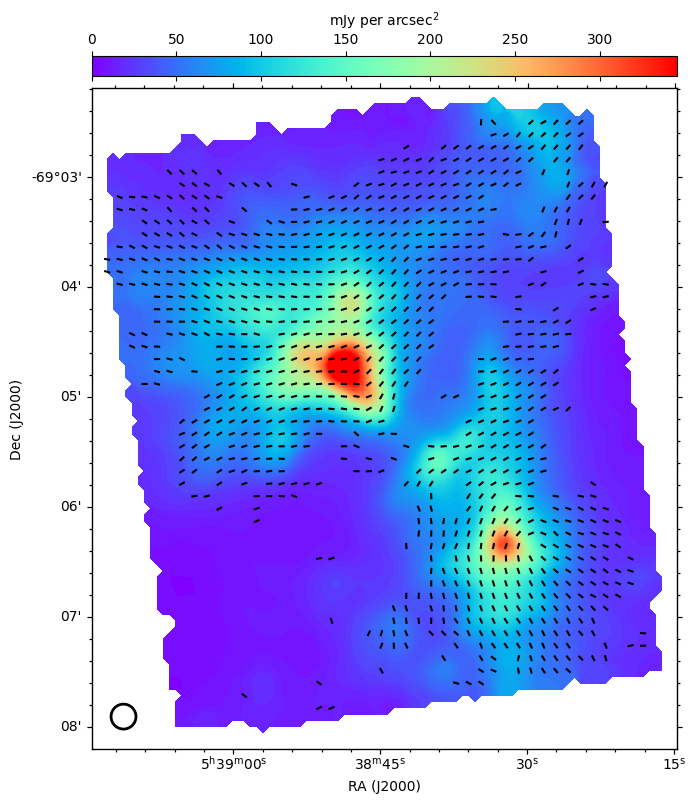

In [3]:
# Create a magnetic field map
Bmap = polobs.Bmap(stepvec=2) # plots every other vector to facilitate reading the figure, default is stepvec=1
Bmap.savefig('Bmap.png',dpi=300)


Creating an adorable vector catalog

Signal-to-Noise Ratio of the Stokes I Total Intensity: 50.0
Signal-to-Noise Ratio of the Polarization Fraction P: 3.0
Maximum Polarization Fraction P allowed: 30.0 %

No mask supplied, creating catalog from all available pixels

Adding polarization vectors to the catalog

Number of elements in the catalog: 3891
Delivering the vector catalog, stay strong!

Constructing a trusty histogram of polarization angles

Calculating mean and standard deviaton of the catalog

Mean: 3.516574344673858
Standard deviation: 37.6502835471614

Circular mean: 10.478353227413603
Circular standard deviation: 37.46462247252287

Number of bins: 36
Bin size used: 5.0

Using the circular mean to center the histogram
Rolling histogram by -2 elements

Fitting a Gaussian profile to the histogram

Goodness of fit
Number of iterations: 41
Reduced chi-squared: 2178.3337008243197

Fitted parameters
Amplitude:          225.83363650005714
                  ± 16.943176324533894

Mean

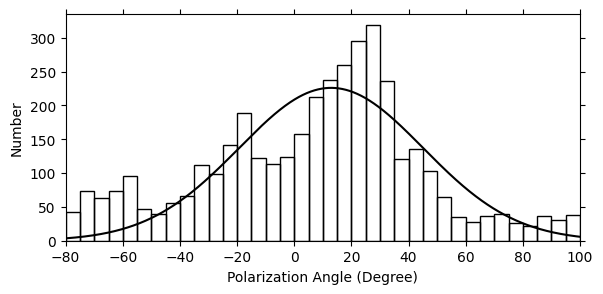

In [4]:
# Creating the vector catalog for the whole region
BigCat = polobs.MakeCat()

# Plotting the histogram and the Gaussian fit for the catalog
BigHisto, BigFit = BigCat.Histogram()
BigHisto.savefig('BigCat.png',dpi=300)


Respectfully masking a region

Creating a rectangular mask

Providing requested mask, have fun!

Plotting a lovable magnetic field map



Plotting the Stokes I total intensity map

INFO: Auto-setting vmax to  3.458e+02 [aplpy.core]

Applying happy selection criteria on polarization vectors

Plotting the magnetic field segments



Returning the APLpy figure as output, please feel free to improve it (see online APLpy.FITSFigure documentation)

Don't forget to save the results using the .savefig('name.png') function

Have fun!


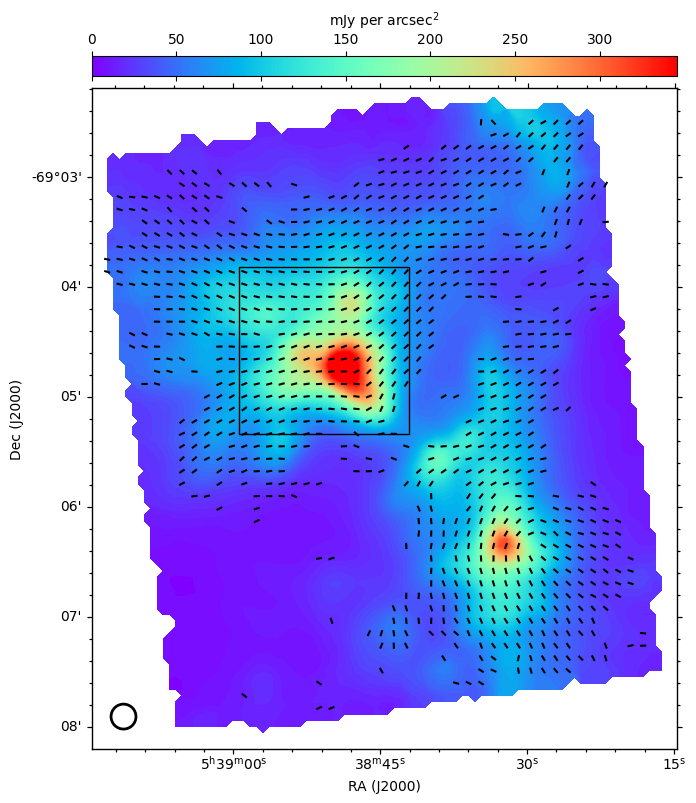

In [5]:
# Creating a mask near the middle of the map
ra_center = 84.7113270 # in degrees
dec_center = -69.0763705 # in degrees
ra_size = 0.0257753  # in degrees
dec_size = 0.0254222 # in degrees
box_angle = 359.99876 # in degrees
PolMask = polobs.MaskRegion(shape='Rectangle', center_RA=ra_center, 
                            center_DEC=dec_center,width=ra_size,
                            height=dec_size, angle=box_angle)

# Saving the mask for future use
PolMask.writeto('PolMask.fits', overwrite=True)
# Once opened through astropy, a fits file created by MaskRegion can be directly used 
# to recreate polarization catalogs (see below)

# Illustrating the region masked
Bmap2 = polobs.Bmap(stepvec=2)
Bmap2.show_rectangles(xw=ra_center,yw=dec_center,width=ra_size,
                     height=dec_size,edgecolor='black')
Bmap2.savefig('Bmap2.png',dpi=300)


Creating an adorable vector catalog

Signal-to-Noise Ratio of the Stokes I Total Intensity: 50.0
Signal-to-Noise Ratio of the Polarization Fraction P: 3.0
Maximum Polarization Fraction P allowed: 30.0 %

Limiting catalog to pixels covered by the mask

Adding polarization vectors to the catalog

Number of elements in the catalog: 705
Delivering the vector catalog, stay strong!

Constructing a trusty histogram of polarization angles

Calculating mean and standard deviaton of the catalog

Mean: 15.857988949305213
Standard deviation: 20.414647888105932

Circular mean: 15.140731917390212
Circular standard deviation: 20.471132073187558

Number of bins: 36
Bin size used: 5.0

Using the circular mean to center the histogram
Rolling histogram by -3 elements

Fitting a Gaussian profile to the histogram

Goodness of fit
Number of iterations: 41
Reduced chi-squared: 99.4059848170975

Fitted parameters
Amplitude:          69.77243051445593
                  ± 4.609106451835842

Mean:              

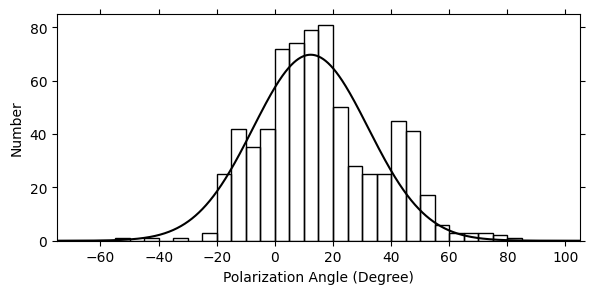

In [6]:
# The MakeCat() function can use the mask above to create a smaller catalog
SmallCat = polobs.MakeCat(mask=PolMask)

# Plotting the histogram and the Gaussian fit for the smaller catalog
SmallHisto, SmallFit = SmallCat.Histogram()
SmallHisto.savefig('SmallCat.png',dpi=300)


Calculating a wise Angular Dispersion Function

Total number of unique pairs: 248160

Creating a catalog of 248160 pairs, hang in there!

Number of unique pairs inside range: 227735
Number of unique pairs outside range: 20425

Robustly building the Angular Dispersion Function

Number of bins for the histogram: 20

Creating the model Angular Dispersion Function based on Houde et al. (2009)
Using Model class from the LMFIT library for Python

Generating the initial conditions for the fit
Turbulence correlation length: 5.0 arcsec
Magnetic field ratio <Bt^2>/<Bo^2>: 0.1
First Taylor coefficient a0: 0.0001
Cloud depth: 20 arcsec
Beam size: 13 arcsec

Cleverly fitting the Angular Dispersion Function

Printing the results of the fit

[[Model]]
    Model(houde2013_adf)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 39
    # data points      = 20
    # variables        = 3
    chi-square         = 672.850372
    reduced chi-square = 39.5794337
    Akaike info crit

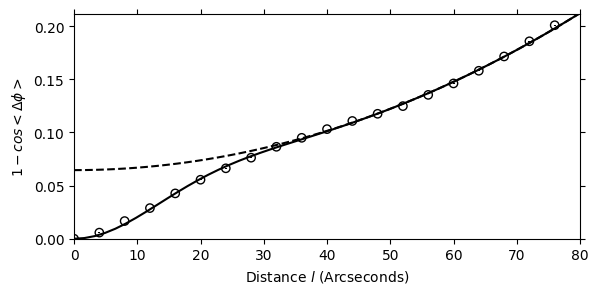

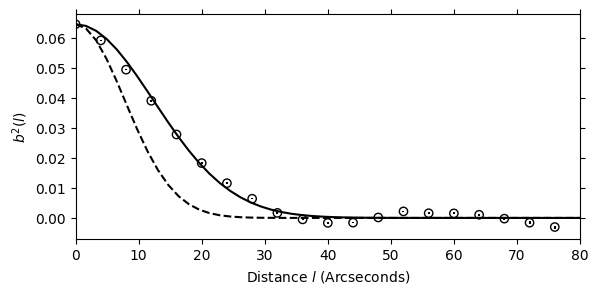

In [7]:
# Creating and fitting the Angular Dispersion Function
ADFfit = SmallCat.ADF(binsize=4.0, deltaPrime=20, beamsize=13, binrange=80.0)
ADFfit[2].savefig('ADF_Structure.png',dpi=300)
ADFfit[3].savefig('ADF_Turbulent.png',dpi=300)


Polarization fraction P as a function of Stokes I


Fitting an error-weighted (in P) power law to the PvI relation

Power law index: -0.2790110013595956 ± 0.04490744276481536
Coefficient: 11.446574717596816 ± 2.4910527664377446

Hopefully plotting a satisfactory figure!

Returning the figure object from matplotlib

Cheers!

Polarized intensity PI as a function of Stokes I

Hopefully plotting a satisfactory figure!

Returning the figure object from matplotlib

Cheers!


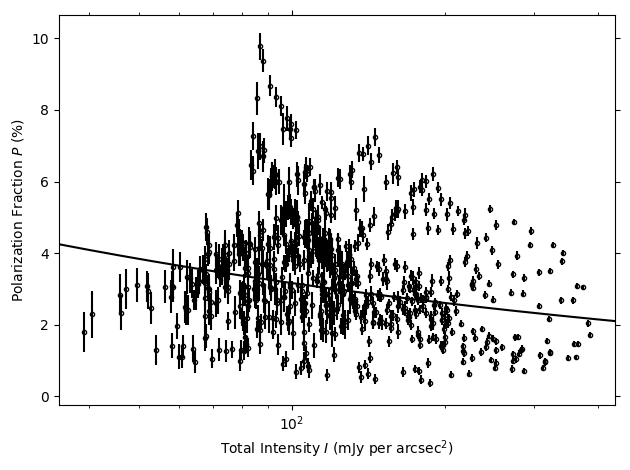

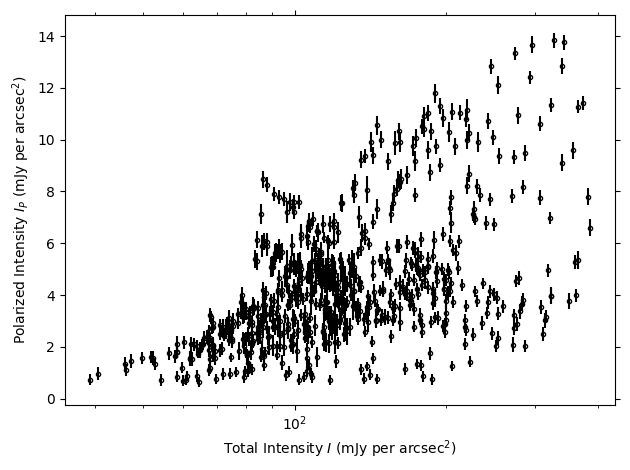

In [8]:
# Plotting the polarization fraction P as a function of the Stokes I total intensity for the selected subregion
PvIplot = SmallCat.PvI(scaleI='log', errorbars='true', showfit='true')
PvIplot.savefig('SmallPvI.png',dpi=300)

# Plotting the polarized intensity PI as a function of the Stokes I total intensity for the selected subregion
PIvIplot = SmallCat.PIvI(scaleI='log', errorbars='true')
PIvIplot.savefig('SmallPIvI.png',dpi=300)